# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Mohamad Fikri Aulya Nor
- Email: mohfikri.aulyanor@gmail.com
- Id Dicoding: nairkivm

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.constants import Constants
from utils.utils import DataUtils
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
import joblib

### Menyiapkan data yang akan diguankan

In [2]:
# Initialize the constants
c = Constants()

# Extract all data into dictionary of pandas DataFrames
data = {}
for source_ in c.source.keys():
    data[source_] = pd.read_csv(c.source[source_])
    print(f"Loaded '{source_}' data")

Loaded 'employee' data


In [3]:
# Preview the data
data['employee'].head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Undestanding

Data Assessment for 'employee':
 > Data shape:  (1470, 35)
 > No column should be dropped v
 > All requirements columns are exists v
 > All column types match the requirements v
 > Missing value columns:
      - Attrition            column : 28.03% (412 )
 > There is no duplicated data v
 > The outliers (EmployeeId, Age, Attrition, DailyRate, DistanceFromHome, Education, EmployeeCount, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager): 


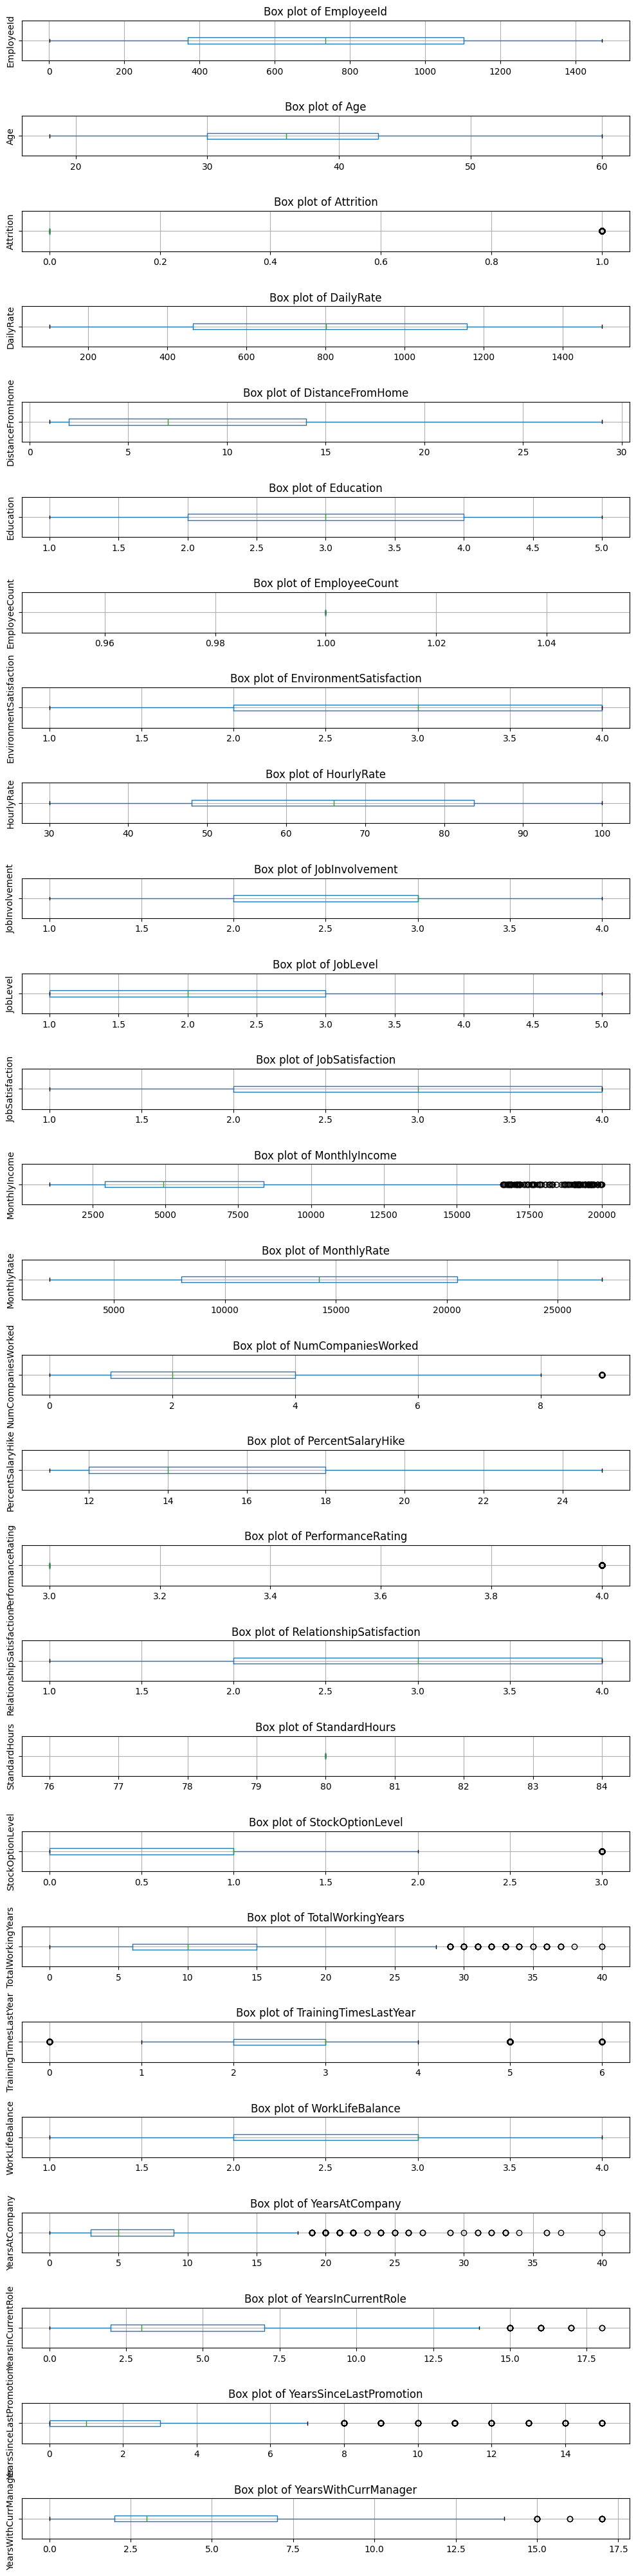

In [4]:
# Initialize DataUtils
u = DataUtils()

# Assess the data using asses_data
u.asses_data(data['employee'], 'employee')

The data contains demographic details, work-related metrics and attrition flag.

* **EmployeeId** - Employee Identifier
* **Attrition** - Did the employee attrition? (0=no, 1=yes)
* **Age** - Age of the employee
* **BusinessTravel** - Travel commitments for the job
* **DailyRate** - Daily salary
* **Department** - Employee Department
* **DistanceFromHome** - Distance from work to home (in km)
* **Education** - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
* **EducationField** - Field of Education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Hourly salary
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Level of job (1 to 5)
* **JobRole** - Job Roles
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly salary
* **MonthlyRate** - Mounthly rate
* **NumCompaniesWorked** - Number of companies worked at
* **Over18** - Over 18 years of age?
* **OverTime** - Overtime?
* **PercentSalaryHike** - The percentage increase in salary last year
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard Hours
* **StockOptionLevel** - Stock Option Level
* **TotalWorkingYears** - Total years worked
* **TrainingTimesLastYear** - Number of training attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany** - Years at Company
* **YearsInCurrentRole** - Years in the current role
* **YearsSinceLastPromotion** - Years since the last promotion
* **YearsWithCurrManager** - Years with the current manager

In [5]:
# Viewing summary of numerical data
data['employee'].describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeId,1470.0,735.500000,424.496761,1.0,368.25,735.5,1102.75,1470.0
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1058.0,0.169187,0.375094,0.0,0.00,0.0,0.00,1.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0


## Data Preparation / Preprocessing

In [6]:
# Create a copy of the data
df = data['employee'].copy()

Clean missing values

In [7]:
# Drop missing values in 'Attrition' 
df = df.dropna(subset=['Attrition'])

# Ensure 'Attrition' is treated as a categorical variable
df['Attrition'] = df['Attrition'].astype('category')

# Separate the 'Attrition' column from the rest of the DataFrame
X = df.drop(columns=['Attrition'])
y = df['Attrition']

In [8]:
# Create a text_columns list
text_columns = list(X.select_dtypes(include=['object']).columns)

# Add label encoded columns to text_columns
label_encoded_columns = ['Education', 'StockOptionLevel']
text_columns.extend(label_encoded_columns)

for col in text_columns:
    # Perform one-hot encoding on 'text' columns
    dummies = pd.get_dummies(X[col].astype('object'), prefix=col).astype(int)

    # Concatenate the dummy variables to the original DataFrame
    X = pd.concat([X, dummies], axis=1)

    # Drop the original column
    X.drop(col, axis=1, inplace=True)

# Preview the updated DataFrame
X.head()

,EmployeeId,Age,DailyRate,DistanceFromHome,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,OverTime_Yes,Education_1,Education_2,Education_3,Education_4,Education_5,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3
1,2,37,1141,11,1,1,61,1,2,2,...,0,0,1,0,0,0,1,0,0,0
2,3,51,1323,4,1,1,34,3,1,3,...,1,0,0,0,1,0,0,0,0,1
3,4,42,555,26,1,3,77,3,4,2,...,0,0,0,1,0,0,0,1,0,0
6,7,40,1124,1,1,2,57,1,2,4,...,1,0,1,0,0,0,0,0,0,1
7,8,55,725,2,1,4,78,3,5,1,...,1,0,0,1,0,0,0,1,0,0


Drop unused column

In [9]:
X = X.drop(columns=['EmployeeId'])

Dropping features with high multicollinearity to avoid redundancy

In [10]:
# Define correlation limit
limit = 0.95
high_correlated_columns = set()

# Create a correlation matrix
correlation_matrix = X.corr(method='pearson')

# Identify features with high multicollinearity
for col in correlation_matrix.columns:
    for key, val in correlation_matrix[col].items():
        if abs(val) > limit and col != key:  # Avoid self-correlation
            high_correlated_columns.add(key)  # Add the correlated column

print(f"Columns with high multicollinearity (>|{limit}|):\n", high_correlated_columns)

# Drop correlated columns from dataframe
X = X.drop(columns=high_correlated_columns)

# Preview the cleaned DataFrame
X.head()

Columns with high multicollinearity (>|0.95|):
 {'Gender_Female', 'JobLevel', 'MonthlyIncome', 'OverTime_No', 'Gender_Male', 'OverTime_Yes'}


,Age,DailyRate,DistanceFromHome,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,NumCompaniesWorked,...,Over18_Y,Education_1,Education_2,Education_3,Education_4,Education_5,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3
1,37,1141,11,1,1,61,1,2,14382,5,...,1,0,1,0,0,0,1,0,0,0
2,51,1323,4,1,1,34,3,3,10332,9,...,1,0,0,0,1,0,0,0,0,1
3,42,555,26,1,3,77,3,2,14864,5,...,1,0,0,1,0,0,0,1,0,0
6,40,1124,1,1,2,57,1,4,13273,2,...,1,0,1,0,0,0,0,0,0,1
7,55,725,2,1,4,78,3,1,21199,5,...,1,0,0,1,0,0,0,1,0,0


Drop Features with (Near-)Zero Variance

Features with very low or near-zero variance are features whose values hardly change across the entire dataset. In other words, these features do not have much variation and do not provide much useful information for the model.

In [11]:
# Setting the variance limit
limit = 0.2
features = X.var()[X.var() / X.max() > limit].index
print(f"Fitur yang dipertahankan\n{features}")
print(f"Fitur yang didrop\n{X.var()[X.var() / X.max() <= limit].index}")

# Select features
X = X[features]

# Preview the cleaned DataFrame
X.head()

Fitur yang dipertahankan
Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Medical', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Education_3', 'StockOptionLevel_0',
       'StockOptionLevel_1'],
      dtype='object')
Fitur yang didrop
Index(['EmployeeCount', 'JobInvolvement', 'PerformanceRating', 'StandardHours',
       'WorkLifeBalance', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'Department_Human Resources',
       'EducationField_Human Resources', 'EducationField_Marketing',
       'E

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,...,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Medical,MaritalStatus_Married,MaritalStatus_Single,Education_3,StockOptionLevel_0,StockOptionLevel_1
1,37,1141,11,1,61,2,14382,5,15,1,...,1,1,0,0,1,1,0,0,1,0
2,51,1323,4,1,34,3,10332,9,12,3,...,1,1,0,1,0,1,0,0,0,0
3,42,555,26,3,77,2,14864,5,14,4,...,0,0,1,0,0,1,0,1,0,1
6,40,1124,1,2,57,4,13273,2,22,3,...,1,0,1,0,1,1,0,0,0,0
7,55,725,2,4,78,1,21199,5,13,4,...,1,1,0,0,1,1,0,1,0,1


In [12]:
# Select all columns
columns = X.columns

# Define the number of columns per figure
columns_per_figure = 9

# Split numerical columns into chunks of 9
chunks = [columns[i:i + columns_per_figure] for i in range(0, len(columns), columns_per_figure)]

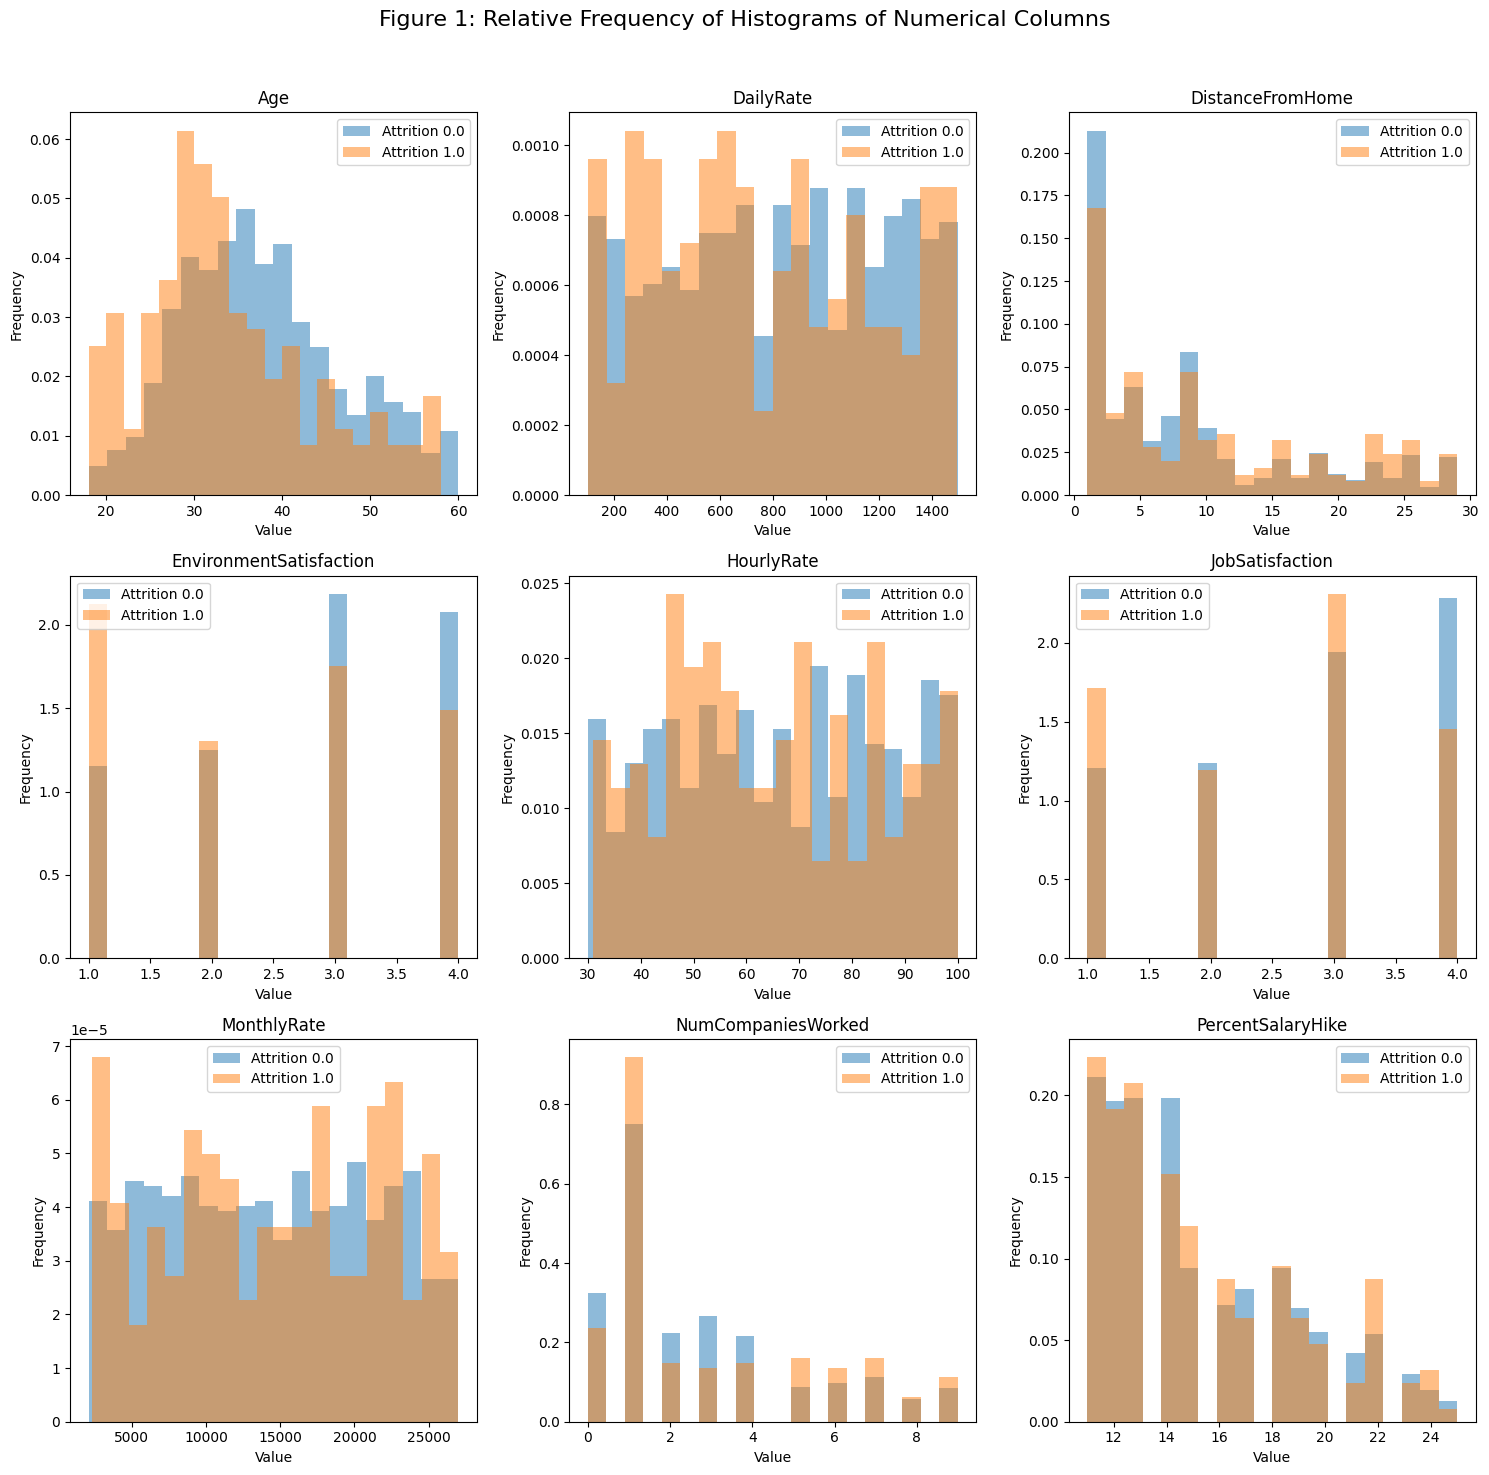

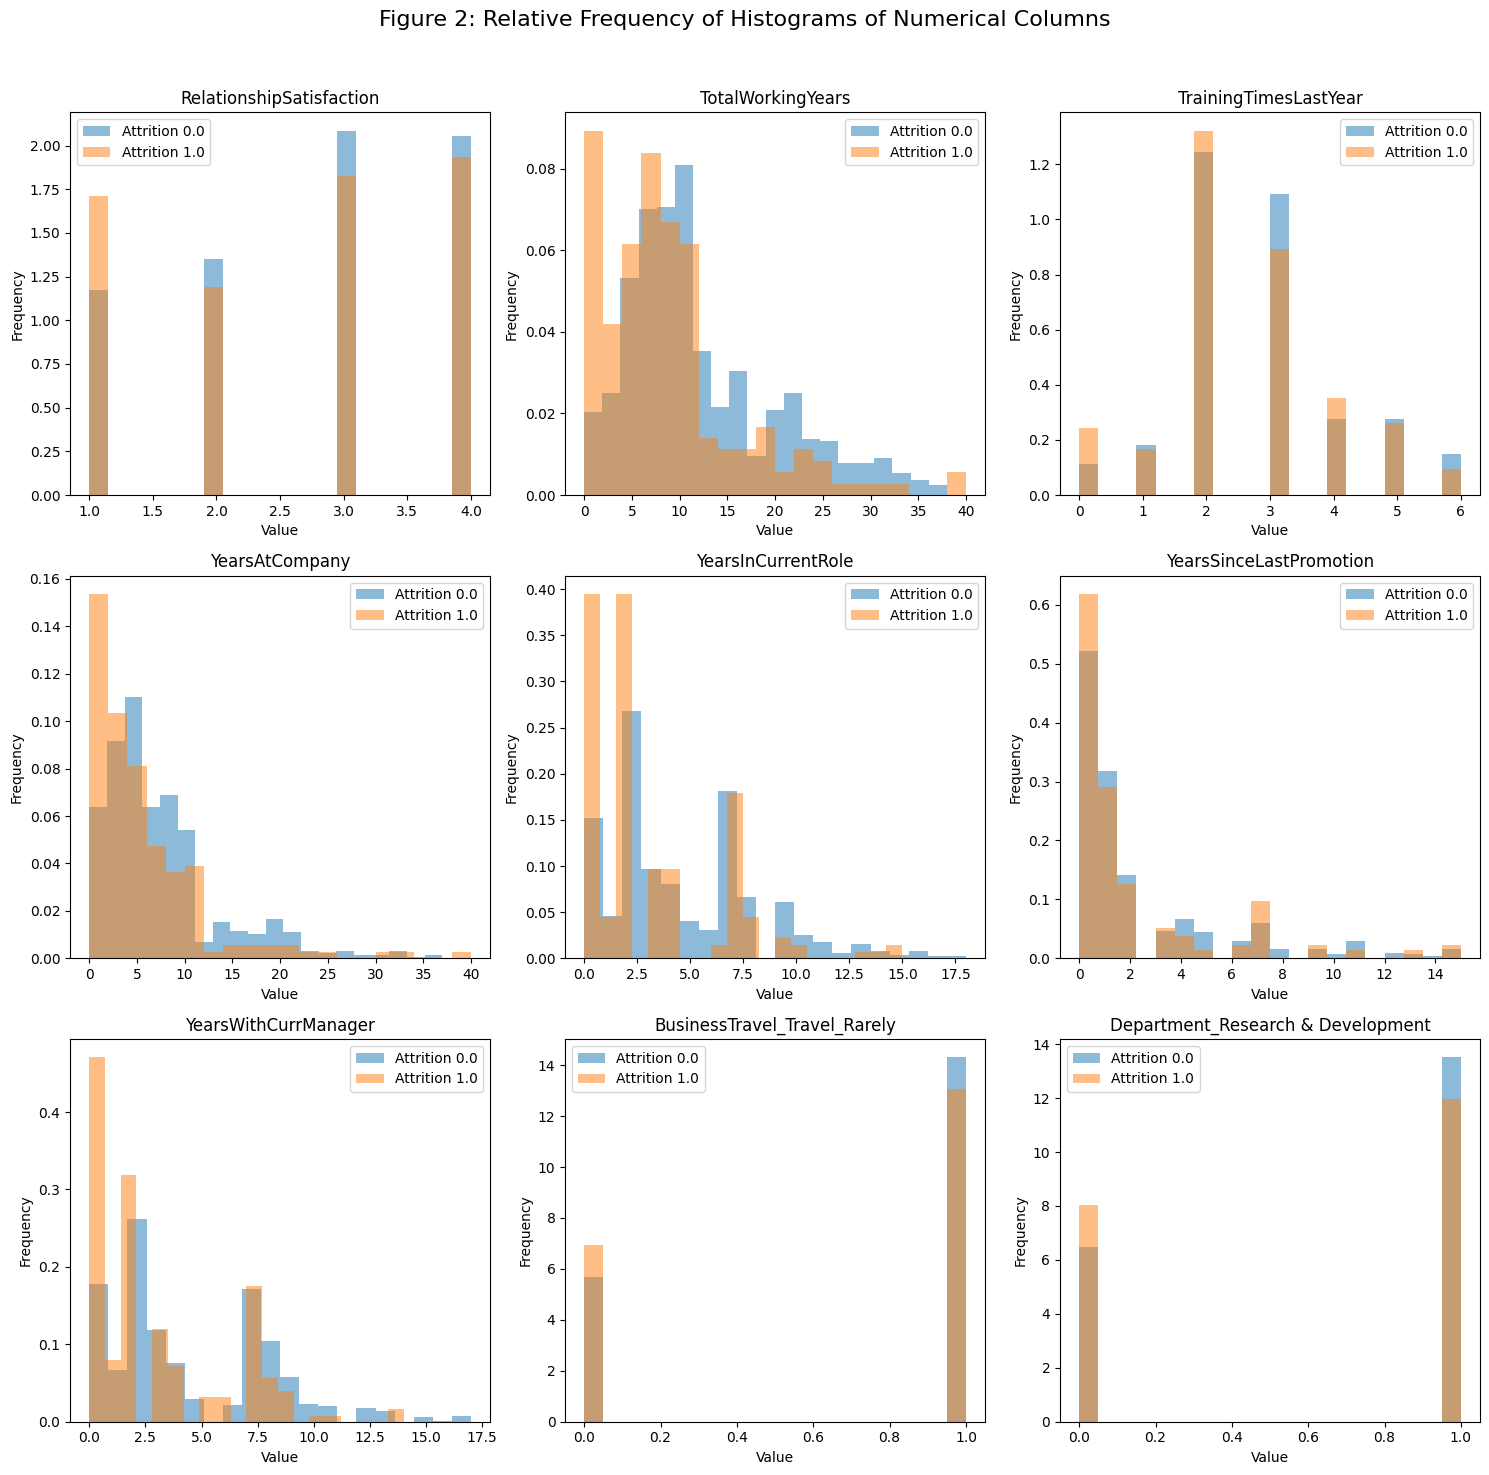

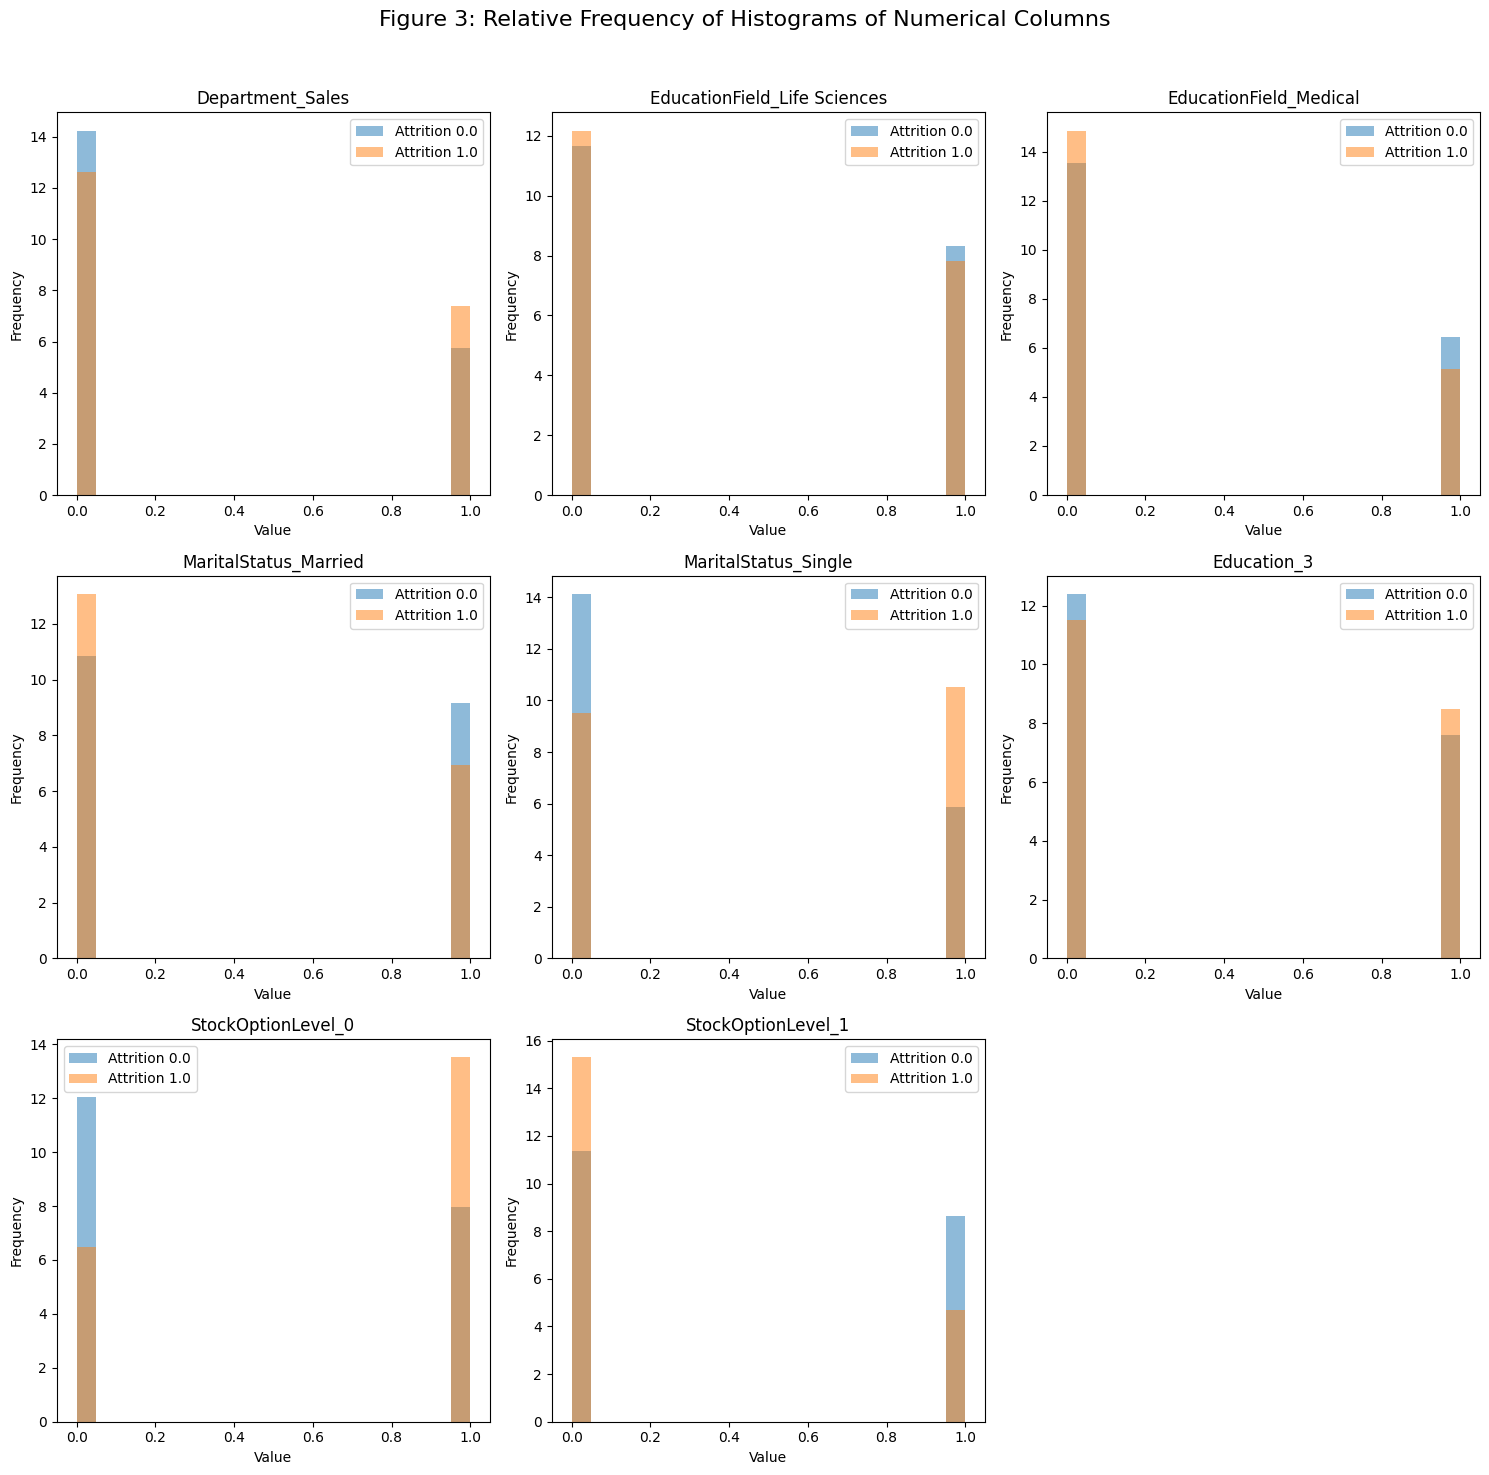

In [13]:
# Create a dummy dataframe
df_dummy = pd.concat([X, df['Attrition']], axis=1)

# Loop through each chunk and create a figure
for i, chunk in enumerate(chunks):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    fig.suptitle(f'Figure {i + 1}: Relative Frequency of Histograms of Numerical Columns', fontsize=16)
    
    # Flatten axes for easier iteration
    axes = axes.flatten()
    
    for j, column in enumerate(chunk):
        ax = axes[j]
        for attrition_value in df_dummy['Attrition'].cat.categories:
            subset = df_dummy[df_dummy['Attrition'] == attrition_value]
            ax.hist(subset[column], bins=20, alpha=0.5, label=f'Attrition {attrition_value}', density=True)
        
        ax.set_title(column)
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
        ax.legend()
    
    # Hide unused subplots
    for k in range(len(chunk), len(axes)):
        fig.delaxes(axes[k])
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()

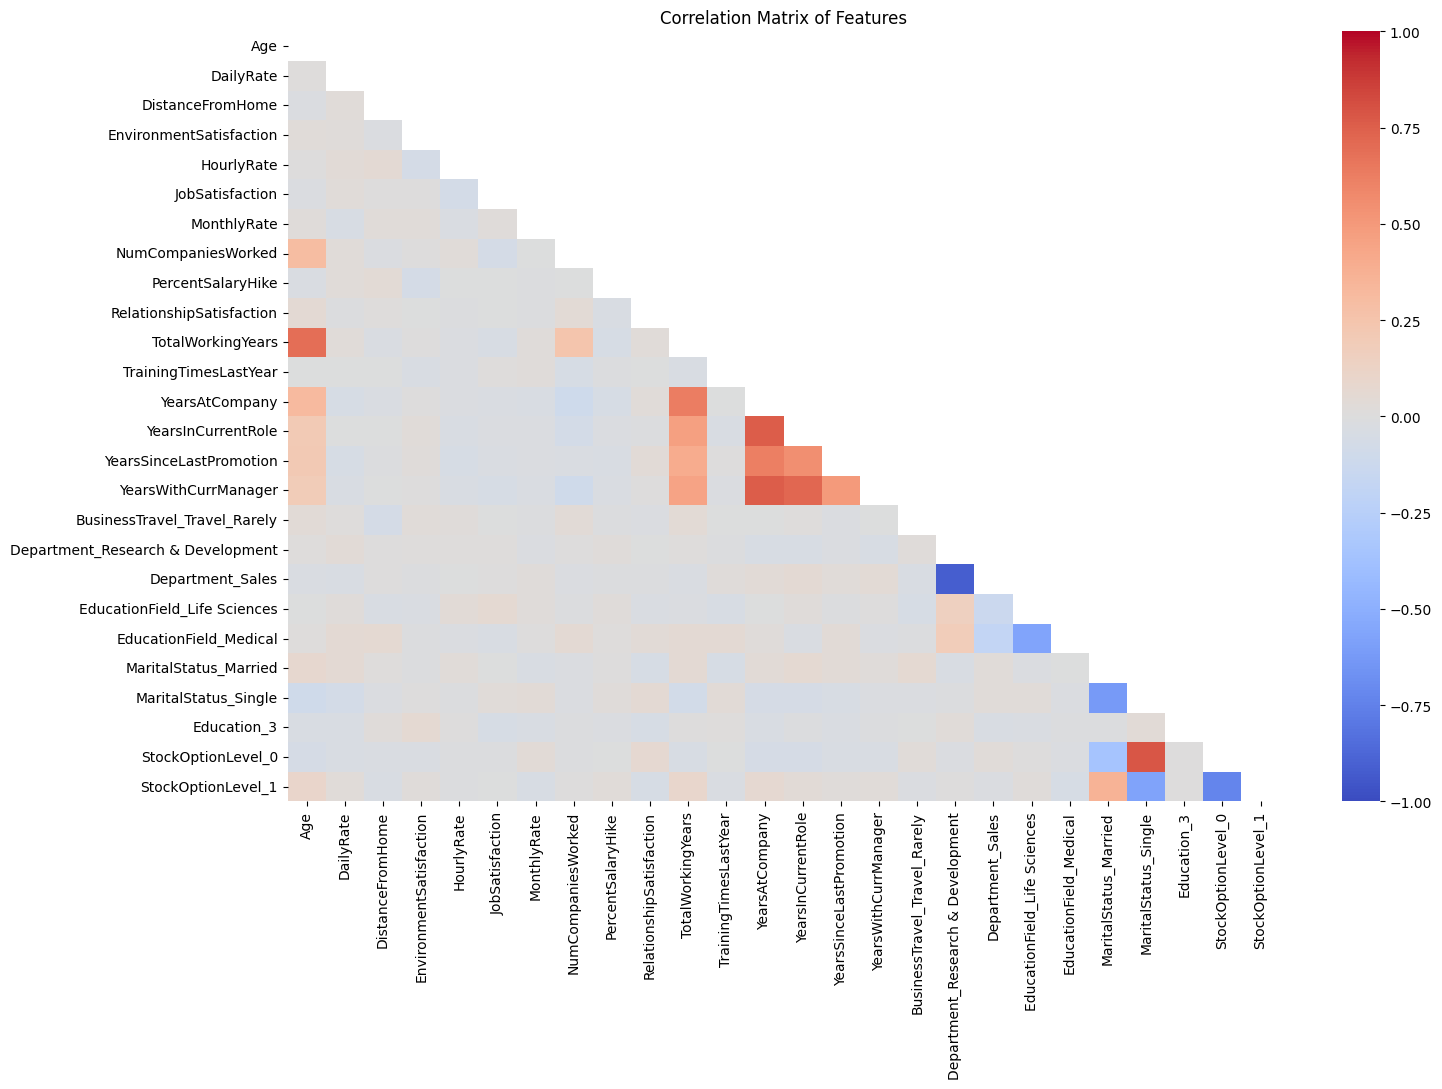

In [14]:
# Create a heatmap correlation matrix
correlation_matrix = X.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

## Modeling

In [15]:
# Visualize percentage of each class
y.value_counts() / y.count() * 100 

Attrition
0.0    83.081285
1.0    16.918715
Name: count, dtype: float64

If one class is <30%, it's a good idea to apply class balancing techniques.

In [16]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

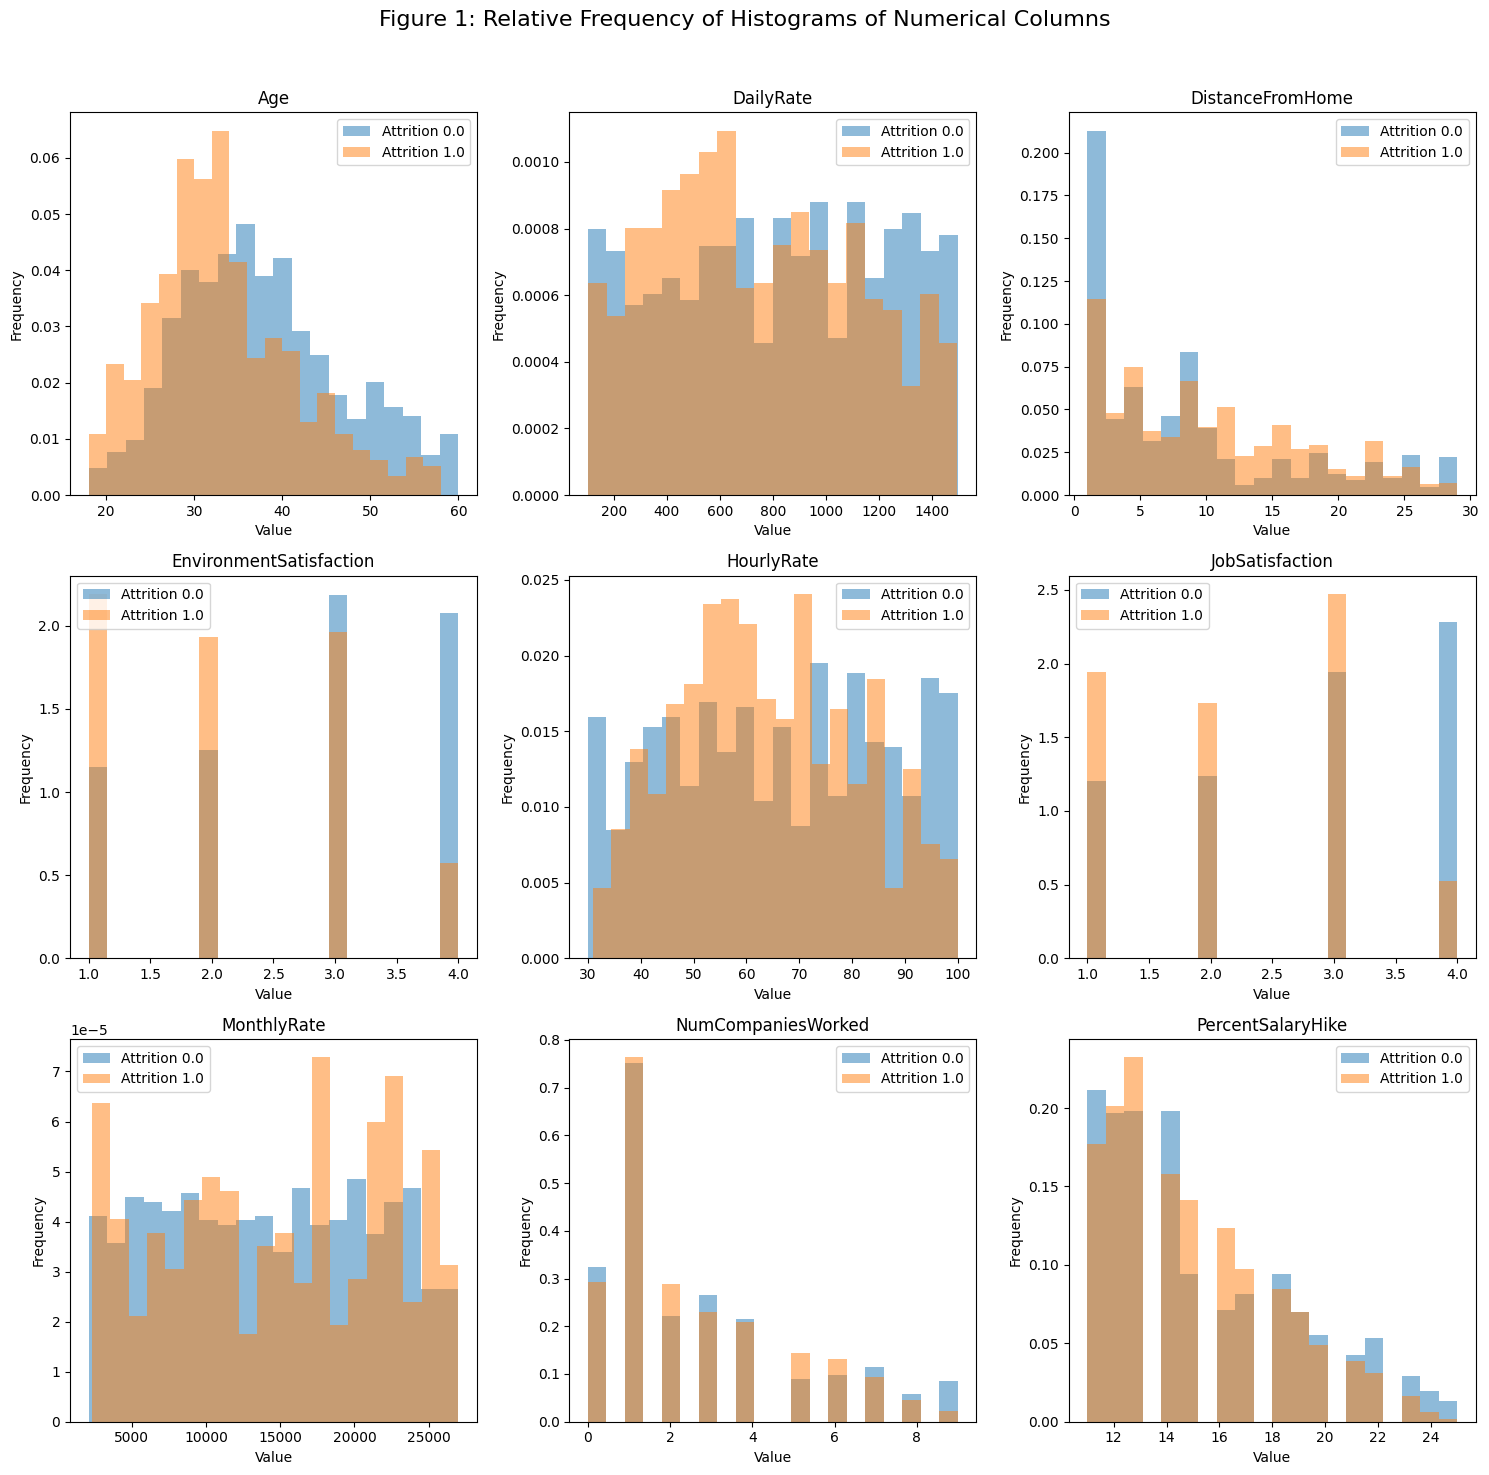

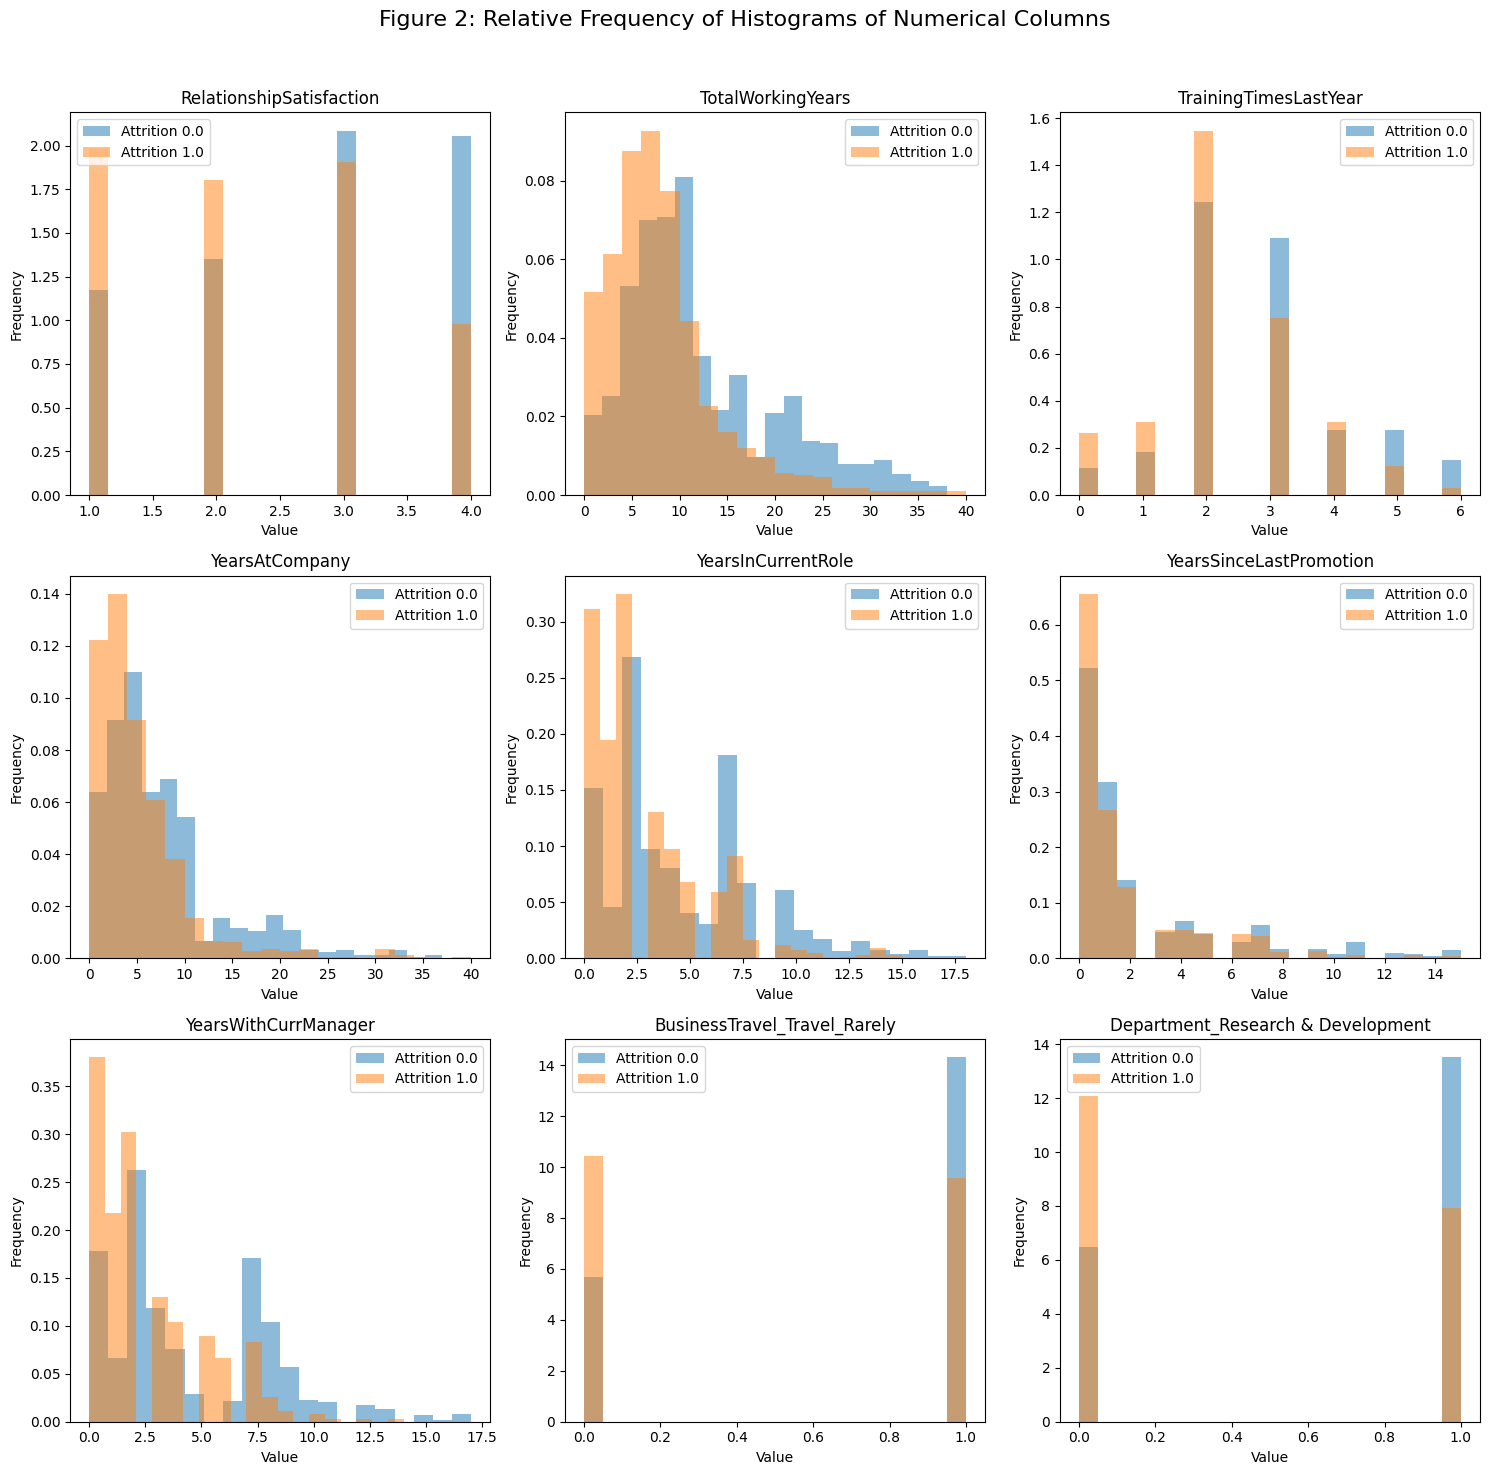

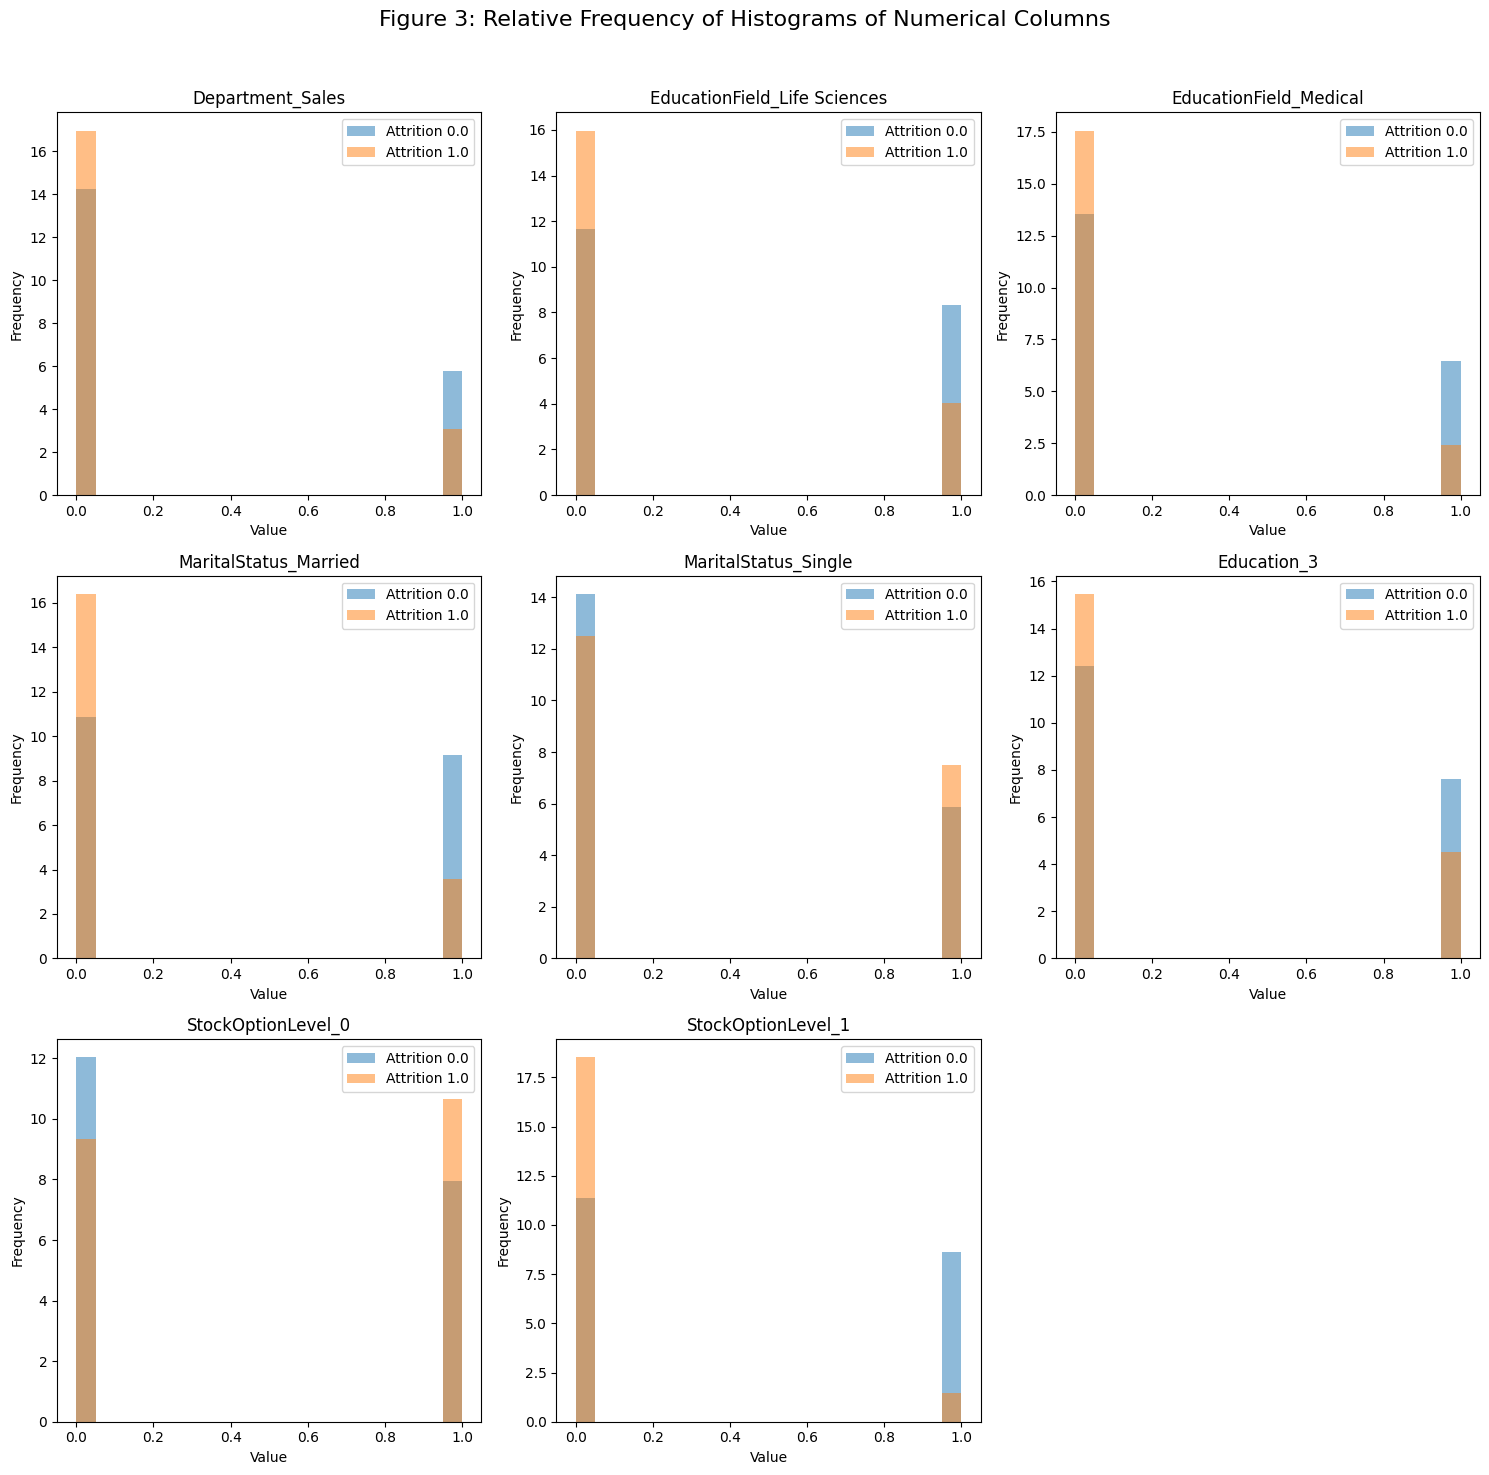

In [17]:
# Create a dummy dataframe
df_dummy = pd.concat([X_resampled, y_resampled], axis=1)

# Loop through each chunk and create a figure
for i, chunk in enumerate(chunks):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    fig.suptitle(f'Figure {i + 1}: Relative Frequency of Histograms of Numerical Columns', fontsize=16)
    
    # Flatten axes for easier iteration
    axes = axes.flatten()
    
    for j, column in enumerate(chunk):
        ax = axes[j]
        for attrition_value in df_dummy['Attrition'].cat.categories:
            subset = df_dummy[df_dummy['Attrition'] == attrition_value]
            ax.hist(subset[column], bins=20, alpha=0.5, label=f'Attrition {attrition_value}', density=True)
        
        ax.set_title(column)
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
        ax.legend()
    
    # Hide unused subplots
    for k in range(len(chunk), len(axes)):
        fig.delaxes(axes[k])
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()

In [18]:
# Scale the data using RobustScaler
scaler = RobustScaler()

numeric_columns = X_resampled.columns
X_resampled[numeric_columns] = scaler.fit_transform(X_resampled[numeric_columns])

In [19]:
# Split the data into training and test sets
def split_data(X: pd.DataFrame, y: pd.Series) -> pd.DataFrame:
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=10)
    print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
    print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(X, y)

Training set shape: X_train=(1406, 26), y_train=(1406,)
Test set shape: X_test=(352, 26), y_test=(352,)


In [20]:
# Create models
def create_models(X_train, y_train):
    svm = SVC().fit(X_train, y_train)
    print('Creating Support Vector Machine (SVM) model done')
    return svm

print(f'{"-"*40}\nCreating models\n{"-"*40}')
svm = create_models(X_train, y_train)
models = {
    'Support Vector Machine (SVM)': svm,
}
print('done')

----------------------------------------
Creating models
----------------------------------------
Creating Support Vector Machine (SVM) model done
done


## Evaluation

In [21]:
# Evaluate the models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    cm = confusion_matrix(y_test, y_test_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1-Score': f1_score(y_test, y_test_pred),
        'MSE_train': mean_squared_error(y_train, y_train_pred),
        'MSE_test': mean_squared_error(y_test, y_test_pred)
    }
    
    return results

evaluations = {}
rows = []

print(f'{"-"*40}\nEvaluating models\n{"-"*40}')
for name, model in models.items():
    results = evaluate_model(model, X_train, y_train, X_test, y_test)
    evaluations[name] = results
    rows.append({
        'Model': name,
        'Accuracy': results['Accuracy'],
        'Precision': results['Precision'],
        'Recall': results['Recall'],
        'F1-Score': results['F1-Score'],
        'MSE_train': results['MSE_train'],
        'MSE_test': results['MSE_train']
    })
    print(f"Evaluating {name} model done")

# Convert the dictionary into a dataframe
summary_df = pd.DataFrame(rows)

----------------------------------------
Evaluating models
----------------------------------------
Evaluating Support Vector Machine (SVM) model done


----------------------------------------
Displaying confusion matrix with Support Vector Machine (SVM) model
----------------------------------------


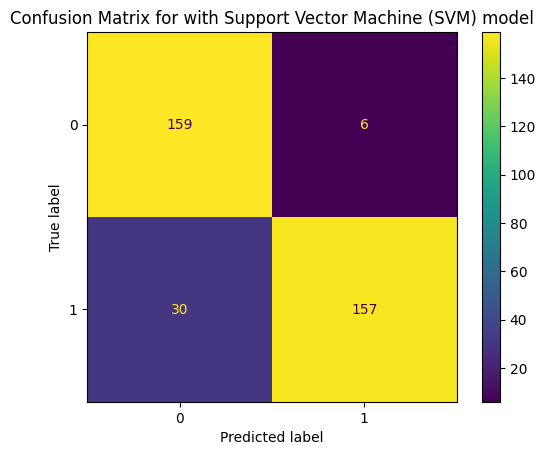

In [22]:
# Display confusion matrix
for name, model in models.items():
    print(f'{"-"*40}\nDisplaying confusion matrix with {name} model\n{"-"*40}')
    fig, ax = plt.subplots()
    cm = evaluations[name]['Confusion Matrix']
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax)
    ax.grid(False)

    ax.set_title(f'Confusion Matrix for with {name} model')
    plt.show()

In [23]:
# Display the performance matrix
summary_df

,Model,Accuracy,Precision,Recall,F1-Score,MSE_train,MSE_test
0,Support Vector Machine (SVM),0.897727,0.96319,0.839572,0.897143,0.068279,0.068279


--------------------------------------------------------------------------------
Learning curve with Support Vector Machine (SVM) model
--------------------------------------------------------------------------------


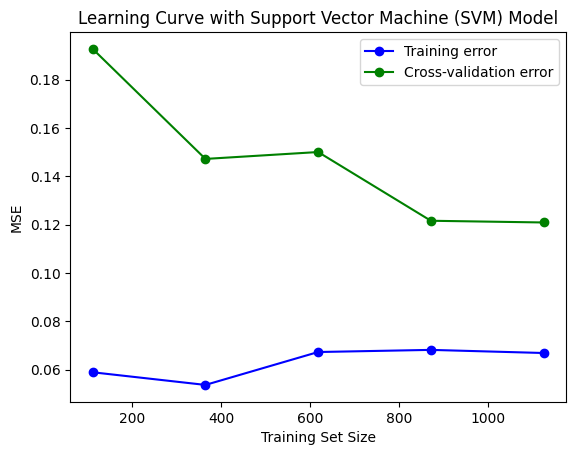

In [24]:
# Display learning curve graph
def show_learning_curve(name, model, X_train, y_train):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    train_mean = -np.mean(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training error")
    plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-validation error")
    plt.title(f"Learning Curve with {name} Model")
    plt.xlabel("Training Set Size")
    plt.ylabel("MSE")
    plt.legend()
    plt.show()

for name, model in models.items():
    print(f'{"-"*80}\nLearning curve with {name} model\n{"-"*80}')
    results = show_learning_curve(name, model, X_train, y_train)

Determine the feature importance

In [25]:
# Compute permutation importance
perm_importance = permutation_importance(models['Support Vector Machine (SVM)'], X_resampled, y_resampled, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

# Create a DataFrame with feature names and importance scores
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean,
    'Std_Dev': perm_importance.importances_std
})

# Sort by importance (descending)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance,Std_Dev
14,YearsSinceLastPromotion,0.039875,0.003311
10,TotalWorkingYears,0.038055,0.003341
5,JobSatisfaction,0.037144,0.003356
11,TrainingTimesLastYear,0.029636,0.003212
9,RelationshipSatisfaction,0.026735,0.004443
25,StockOptionLevel_1,0.022639,0.002865
12,YearsAtCompany,0.022582,0.003908
3,EnvironmentSatisfaction,0.021104,0.003985
18,Department_Sales,0.018714,0.003302
13,YearsInCurrentRole,0.018658,0.003632


## Tuning

In [26]:
# Define the hyperparameters and their values
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}


# Perform grid search
def perform_grid_search(param_grid, model, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, refit=True, verbose=2, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

In [27]:
selected_model = models['Support Vector Machine (SVM)']
initial_params = selected_model.get_params()
best_params = perform_grid_search(param_grid, selected_model, X_train, y_train)
best_params = best_params if best_params is not None else {'C': '', 'gamma': '', 'kernel': ''}

params_df = (
    pd.DataFrame(
        [initial_params, best_params],
        index=['Initial Parameter', 'Best Parameter']
    )
    .dropna(axis=1)
)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [28]:
params_df

,C,gamma,kernel
Initial Parameter,1.0,scale,rbf
Best Parameter,1.0,0.1,rbf


## Model Re-evaluation

In [29]:
# Fit the model
new_params = params_df.loc['Best Parameter'].to_dict()
new_model = SVC(**new_params)
new_model = new_model.fit(X_train, y_train)

In [30]:
# Evaluate the model

rows = []
name = 'SVM with Best Params'

print(f'{"-"*40}\nEvaluating models\n{"-"*40}')
evaluations = {}
results = evaluate_model(new_model, X_train, y_train, X_test, y_test)
evaluations[name] = results
rows.append({
    'Model': name,
    'Accuracy': results['Accuracy'],
    'Precision': results['Precision'],
    'Recall': results['Recall'],
    'F1-Score': results['F1-Score'],
    'MSE_train': results['MSE_train'],
    'MSE_test': results['MSE_train']
})
print(f"Evaluating {name} model done")

# Concat the summary to existing dataframe
summary_df = (
    pd.concat([summary_df, pd.DataFrame(rows)], axis=0)
    .reset_index(drop=True)
)

----------------------------------------
Evaluating models
----------------------------------------
Evaluating SVM with Best Params model done


----------------------------------------
Displaying confusion matrix with SVM with Best Params model
----------------------------------------


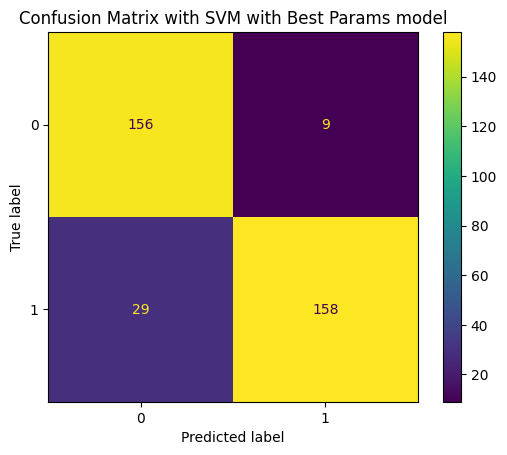

In [31]:
# Display the confusion matrix
print(f'{"-"*40}\nDisplaying confusion matrix with {name} model\n{"-"*40}')
fig, ax = plt.subplots()
cm = evaluations[name]['Confusion Matrix']
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
ax.grid(False)

ax.set_title(f'Confusion Matrix with {name} model')
plt.show()

In [32]:
summary_df

,Model,Accuracy,Precision,Recall,F1-Score,MSE_train,MSE_test
0,Support Vector Machine (SVM),0.897727,0.963190,0.839572,0.897143,0.068279,0.068279
1,SVM with Best Params,0.892045,0.946108,0.844920,0.892655,0.036984,0.036984


SVM with default parameter is better, so I will use this model.

## Exporting Model and Data

In [33]:
# Export the model with 

joblib.dump(selected_model, './svm_model.pkl')
joblib.dump(scaler, './scaler.pkl')

['./scaler.pkl']

In [34]:
X_resampled

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,...,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Medical,MaritalStatus_Married,MaritalStatus_Single,Education_3,StockOptionLevel_0,StockOptionLevel_1
0,0.250000,0.559115,0.272727,-1.0,-0.100000,-1.0,-0.032347,1.000000,0.2,-2.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.416667,0.836766,-0.363636,-1.0,-1.000000,0.0,-0.354229,2.333333,-0.4,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.666667,-0.334859,1.636364,0.0,0.433333,-1.0,0.005961,1.000000,0.0,1.0,...,-1.0,-1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.500000,0.533181,-0.636364,-0.5,-0.233333,1.0,-0.120487,0.000000,1.6,0.0,...,0.0,-1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,1.750000,-0.075515,-0.545455,0.5,0.466667,-2.0,0.509448,1.000000,-0.2,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,-1.083333,-0.916095,0.272727,-0.5,0.566667,-1.0,0.843251,-0.333333,0.2,0.0,...,-1.0,-1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1754,-0.750000,0.026697,-0.090909,-0.5,-0.666667,0.0,0.195990,0.000000,-0.2,-2.0,...,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1755,-0.333333,0.264683,0.727273,-0.5,0.533333,0.0,0.003656,-0.333333,-0.2,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1756,0.416667,-0.510297,0.454545,-0.5,-0.300000,-2.0,0.192255,0.000000,0.6,-1.0,...,-1.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [35]:
# Predict unknown attrition from original data

df_predict = data['employee'].copy()
df_predict = df_predict[df_predict['Attrition'].isna()]
X_predict = df_predict

Apply one-hot encoding

In [36]:
# Create a text_columns list
text_columns = list(X_predict.select_dtypes(include=['object']).columns)

# Add label encoded columns to text_columns
label_encoded_columns = ['Education', 'StockOptionLevel']
text_columns.extend(label_encoded_columns)

for col in text_columns:
    # Perform one-hot encoding on 'text' columns
    dummies = pd.get_dummies(X_predict[col].astype('object'), prefix=col).astype(int)

    # Concatenate the dummy variables to the original DataFrame
    X_predict = pd.concat([X_predict, dummies], axis=1)

    # Drop the original column
    X_predict.drop(col, axis=1, inplace=True)

# Preview the updated DataFrame
X_predict.head()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,OverTime_Yes,Education_1,Education_2,Education_3,Education_4,Education_5,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3
0,1,38,NaN,1444,1,1,4,88,3,1,...,1,0,0,0,1,0,0,1,0,0
4,5,40,NaN,1194,2,1,3,98,3,1,...,0,0,0,0,1,0,0,0,0,1
5,6,29,NaN,352,6,1,4,87,2,1,...,0,1,0,0,0,0,1,0,0,0
12,13,47,NaN,571,14,1,3,78,3,2,...,1,0,0,1,0,0,0,1,0,0
18,19,25,NaN,772,2,1,4,77,4,2,...,0,1,0,0,0,0,0,0,1,0


In [37]:
# Drop unnecessary columns
X_predict = X_predict[X_resampled.columns]

In [38]:
# Apply scaling
scaler = joblib.load('./scaler.pkl')
X_predict[numeric_columns] = scaler.transform(X_predict[numeric_columns])

In [39]:
# Predict unknown attrition
selected_model = joblib.load('./svm_model.pkl')
y_predict = selected_model.predict(X_predict)
df_predict['Attrition'] = y_predict

In [40]:
# Export to csv files
df_predict.to_csv('./employee_data_prediction.csv', index=False)

In [41]:
df_predict['Attrition'].value_counts()

Attrition
0.0    351
1.0     61
Name: count, dtype: int64

In [42]:
# Export importance to csv files
importance_df.to_csv('./feature_importance.csv', index=False)

In [43]:
# Export summary to csv files
summary_df.to_csv('./model_summary.csv', index=False)

## Deployment

Prediction app sudah dideploy ke dalam aplikasi Streamlit dari source code [berikut](https://github.com/nairkivm/deploy-app-jaya-jaya-maju) dan bisa diakses ke link [berikut](https://metabase-production-469c.up.railway.app/public/dashboard/c4b5a4b9-1231-4841-9dec-8f00a1c48449).